# Problem Statement

Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

# Objective

Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

1. Identify top-performing products, channels, and regions driving revenue and profit
2. Uncover seasonal trends and anomalies for optimized planning
3. Spot pricing and margin risks from outlier transactions
4. Inform pricing, promotion, and market-expansion strategies

# Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
sheets = pd.read_excel(r"C:\Users\kavin\Downloads\Regional-Sales-Analysis-Project\regional-sales-dataset.xlsx", sheet_name= None)

In [7]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [8]:
# Assigning dataframes to the sheets we have

df_sales = sheets['Sales Orders']
df_customer = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg= sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [9]:
# Checking the shape of the sheets we have

print(f"df_sales shape: {df_sales.shape}")
print(f"df_customer shape: {df_customer.shape}")
print(f"df_products shape: {df_products.shape}")
print(f"df_regions shape: {df_regions.shape}")
print(f"df_state_reg shape: {df_state_reg.shape}")
print(f"df_budgets shape: {df_budgets.shape}")

df_sales shape: (64104, 12)
df_customer shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


In [10]:
df_sales.head(3)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740


In [11]:
df_customer.head(3)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd


In [12]:
df_products.head(3)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3


In [13]:
df_regions.head(3)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago


In [14]:
df_state_reg.head(3)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South


In [15]:
# Fixing the header

new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [16]:
df_budgets.head(3)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432


In [17]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


# Data exploration

In [18]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [19]:
df_customer.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [20]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [21]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [22]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [23]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

# Data cleaning and wrangling

In [24]:
# Merging with customers 

df = df_sales.merge(df_customer, how= 'left', left_on = 'Customer Name Index', right_on = 'Customer Index')

In [25]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,74,Dazzlesphe Corp
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,51,Yombu Corp
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,136,Bath Group
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,158,Linklinks Ltd


In [26]:
# Merging with products

df = df.merge(df_products, how = 'left', left_on = 'Product Description Index', right_on= 'Index')

In [27]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,74,Dazzlesphe Corp,26,Product 26
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,51,Yombu Corp,21,Product 21
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,136,Bath Group,13,Product 13
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,158,Linklinks Ltd,20,Product 20


In [28]:
# Merging with regions

df = df.merge(df_regions, how= 'left', left_on = 'Delivery Region Index', right_on = 'id')
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York


In [29]:
# Merging state regions

df = df.merge(df_state_reg[["State Code", "Region"]], how='left', left_on = 'state_code', right_on = 'State Code')
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,PA,Northeast
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,IL,Midwest
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,FL,South
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,NY,Northeast


In [30]:
# Merging the budgets

df = df.merge(df_budgets, how = 'left', on = 'Product Name')

In [31]:
df.to_csv('test.csv')

In [32]:
# Cleaning up redundant columns

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [33]:
# Converting all columns to lower case for consistency and ease of access

df.columns = df.columns.str.lower()
df

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,2067108.120


In [34]:
# Keeping the important columns and deleting the unnecessary ones

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [35]:
df = df[cols_to_keep]
df

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,5685138.270
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,959899.218
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,3720639.645
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,2067108.120


In [36]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [37]:
# Our dataframe is finally ready

In [38]:
df = df.rename(columns = {
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total_unit_cost': 'cost',
    'state code': 'state',
    'latitude': 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budget'
})

In [39]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [40]:
# Blanking out budgets for non-2017 orders

df.loc[df['order_date'].dt.year != 2017,'budget'] = pd.NA

df[['order_date', 'product_name', 'revenue', 'budget']].head()

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [41]:
df[['order_date', 'product_name', 'revenue', 'budget']].tail()

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [42]:
df.to_csv('final.csv')

In [43]:
df.head(30)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN
5,SO - 0010394,2014-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,MN,Hennepin County,Minnesota,Midwest,44.91330,-93.50329,NaN
6,SO - 0008865,2014-01-01,Kare Corp,Wholesale,Product 1,7,2874.3,20120.1,1667.094,MA,Norfolk County,Massachusetts,Northeast,42.32385,-71.14200,NaN
7,SO - 0009909,2014-01-01,State Ltd,Wholesale,Product 25,10,1045.2,10452.0,679.380,CA,Los Angeles County,California,West,34.05529,-117.75228,NaN
8,SO - 0001912,2014-01-01,Lazzy Group,Wholesale,Product 13,5,3852.5,19262.5,2966.425,UT,Salt Lake County,Utah,West,40.56217,-111.92966,NaN
9,SO - 0002683,2014-01-01,Zooveo Company,Export,Product 14,12,2914.5,34974.0,1311.525,NC,Alamance County/Guilford County,North Carolina,South,36.07613,-79.46830,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  lon              64104 non-null  float

In [45]:
# Filtering the dataset to include the records from the year 2017

df_2017 = df[df['order_date'].dt.year == 2017]

In [46]:
df_2017

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,Jackson County/Clay County,Missouri,Midwest,39.08547,-94.35210,3016489.209
61622,SO - 0004785,2017-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,Philadelphia County,Pennsylvania,Northeast,39.95234,-75.16379,2642352.432
61623,SO - 0004950,2017-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,Volusia County,Florida,South,29.13832,-80.99561,1672229.416
61624,SO - 0006829,2017-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,New Haven County,Connecticut,Northeast,41.22509,-73.06111,1672229.416


In [47]:
df.isnull().sum()

order_number           0
order_date             0
customer_name          0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total unit cost        0
state_code             0
county                 0
state                  0
region                 0
lat                    0
lon                    0
budget             48841
dtype: int64

In [48]:
df_2017.isnull().sum()

order_number       0
order_date         0
customer_name      0
channel            0
product_name       0
order_quantity     0
unit_price         0
revenue            0
total unit cost    0
state_code         0
county             0
state              0
region             0
lat                0
lon                0
budget             0
dtype: int64

# Feature engineering

In [49]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [50]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [51]:
df['profit'] = df['revenue'] - df['total_cost']

In [52]:
df['profit_margin_pct'] = df['profit']/df['revenue'] * 100

In [53]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


# Exploratory Data Analysis

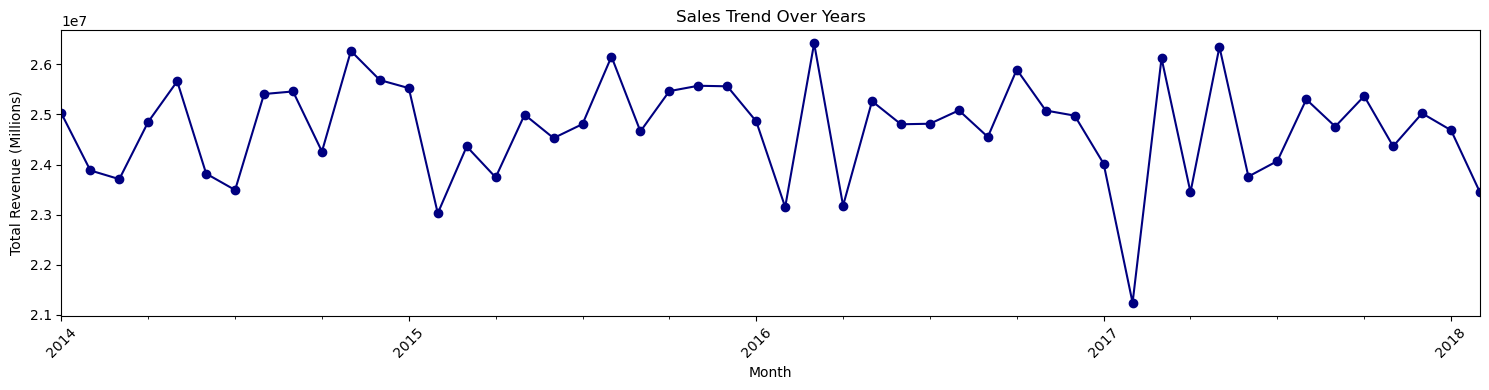

In [54]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize = (15,4))
monthly_sales.plot(marker = 'o', color = 'navy')
plt.title('Sales Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

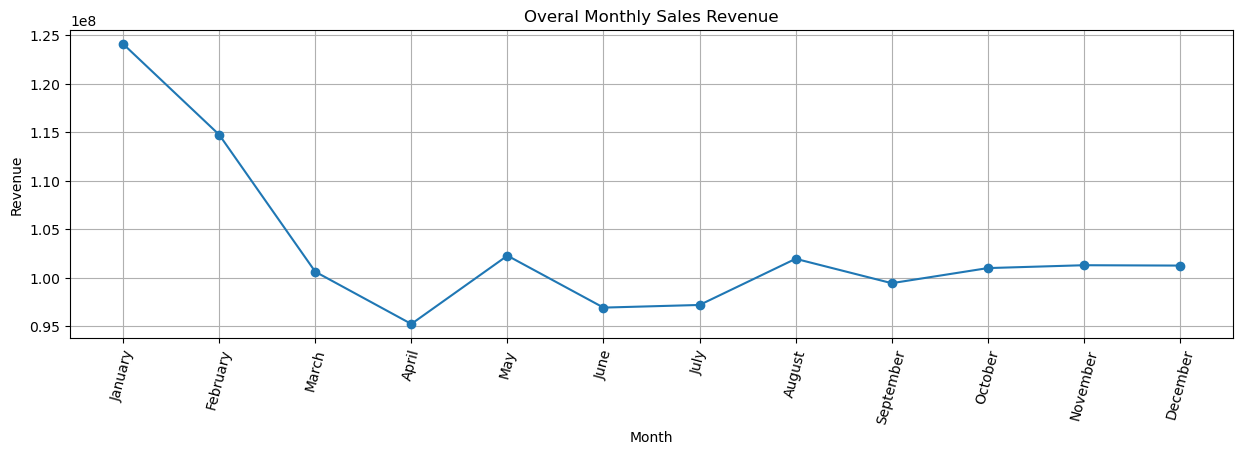

In [55]:
# There is an issue with this. The issue is the data is taking into account the months jan and febin 2018

df['order_month_name'] = df['order_date'].dt.month_name()

df['order_month_num'] = df['order_date'].dt.month

monthly_sales = df.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().reset_index().sort_index()

plt.figure(figsize=(15,4))
plt.plot(monthly_sales['order_month_name'],monthly_sales['revenue'], marker = 'o')
plt.title("Overal Monthly Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation = 75)
plt.grid(True)
plt.show()

In [56]:
df.to_csv('final.csv')

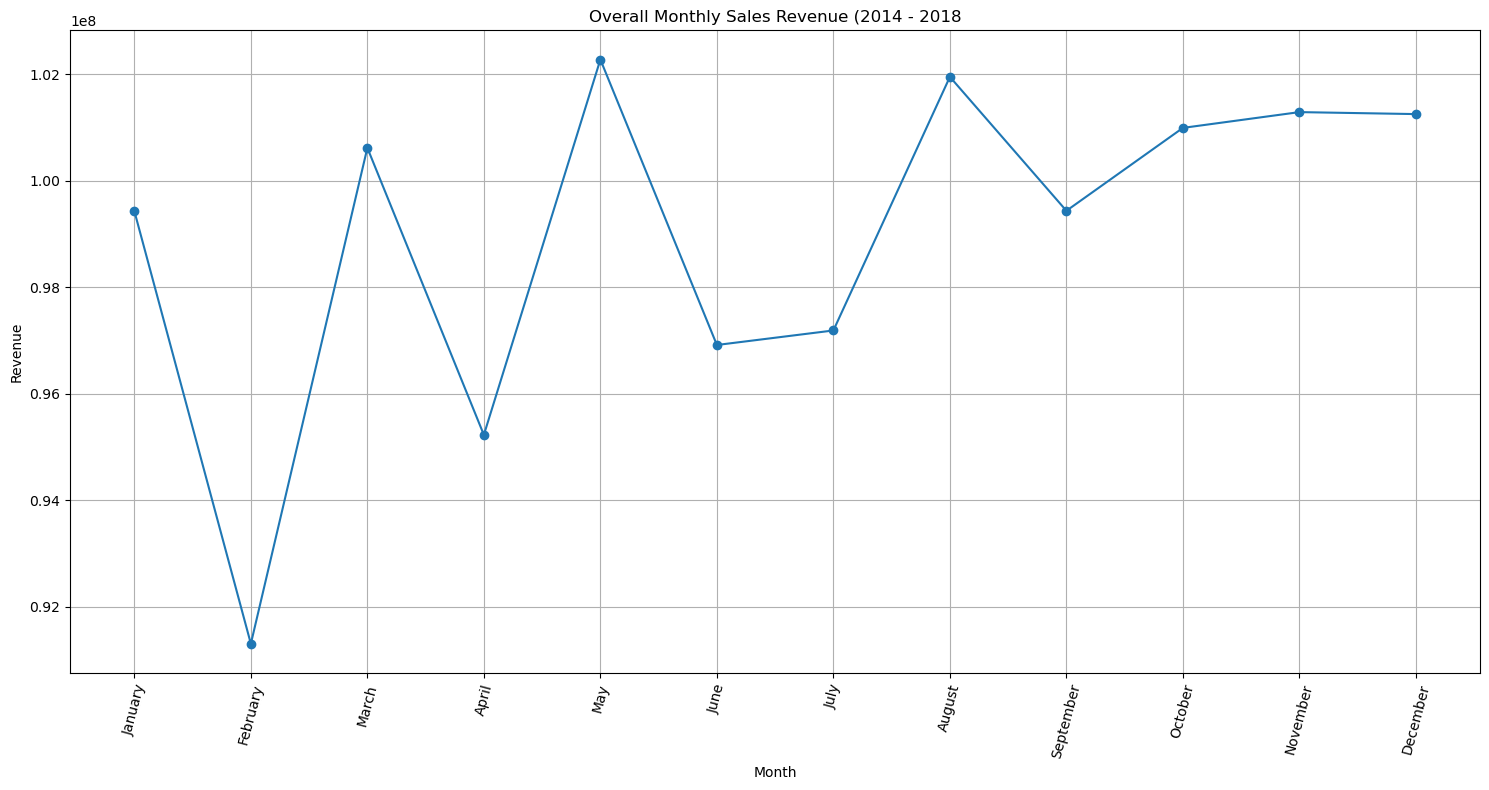

In [57]:
# Fixing the issue to find the monthly trends 

# Boolen series of the results we need

mask = (
    (df['order_date'].dt.year >= 2014) &
    (df['order_date'].dt.year <= 2018) &
    ~(
        (df['order_date'].dt.year == 2018) &
        (df['order_date'].dt.month.isin([1, 2]))
    )
)

df_new = df.loc[mask].copy()

df_new['order_month_name'] = df_new['order_date'].dt.month_name()
df_new['order_month_num'] = df_new['order_date'].dt.month

monthly_sales = (
    df_new.groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .reset_index()
    .sort_values('order_month_num')
)

plt.figure(figsize=(15,8))
plt.plot(monthly_sales['order_month_name'], monthly_sales['revenue'],marker = 'o')
plt.title('Overall Monthly Sales Revenue (2014 - 2018')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation = 75)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Sales peak in May, August, and December, indicating strong seasonal demand during these months. 
# February, April, and June show the lowest revenue, suggesting potential for targeted promotions or cost-saving measures during slower periods.

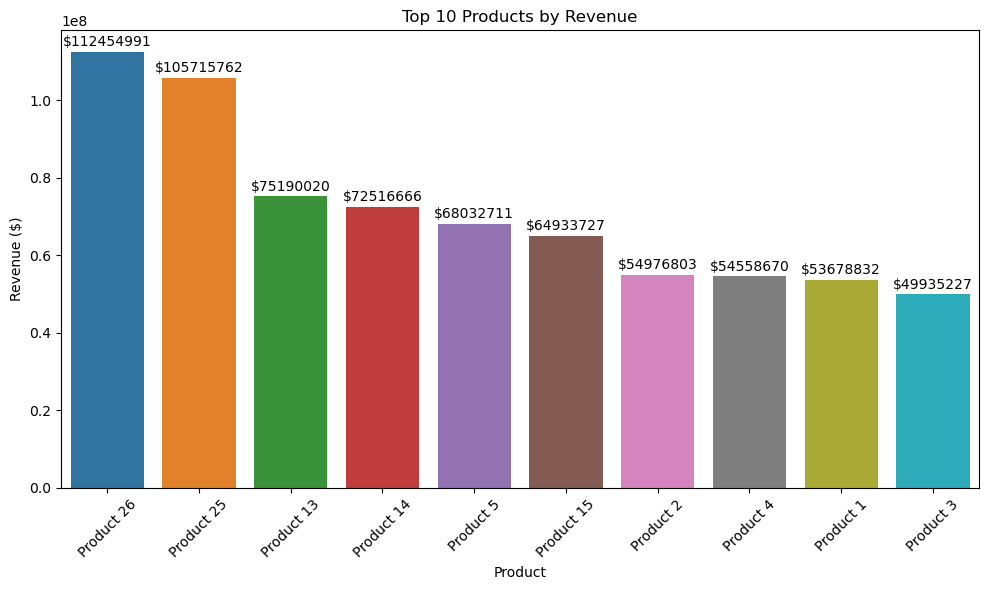

In [58]:
# Top 10 products by revenue 

product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

top_10_product = product_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_10_product,
    x='product_name',
    y='revenue',
    hue='product_name',
    palette='tab10',
    legend=False
)


for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', label_type='edge', padding=2)

plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
# This chart shows the top-performing products in the company. Product 26 leads in sales revenue, followed by Product 25. 
# Both outperform the rest of the top 10 by a significant margin, highlighting their strategic importance for growth and investment. 

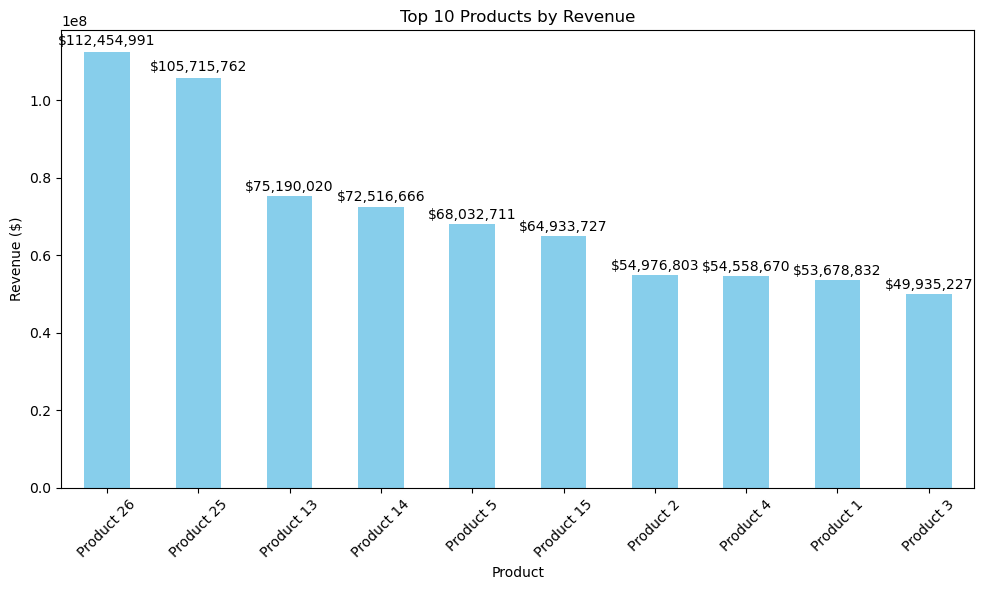

In [59]:
# Get top 10 products by revenue

top_10 = df_new.groupby('product_name', as_index=False)['revenue'].sum().nlargest(10, 'revenue')

# Plot
ax = top_10.plot.bar(
    x='product_name',
    y='revenue',
    color='skyblue',
    figsize=(10,6),
    legend=False
)

# Add labels on top
for i, v in enumerate(top_10['revenue']):
    ax.text(i, v + v*0.01, f"${v:,.0f}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


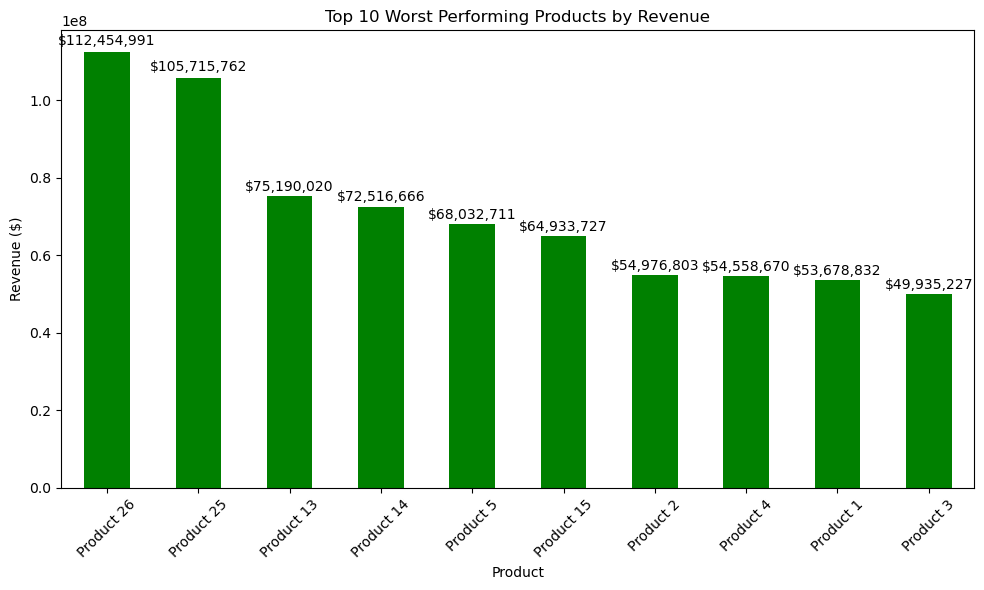

In [71]:
# Worst performing products by revenue

top_10 = df_new.groupby('product_name', as_index=False)['revenue'].sum().nlargest(10, 'revenue')

# Plot
ax = top_10.plot.bar(
    x='product_name',
    y='revenue',
    color='green',
    figsize=(10,6),
    legend=False
)

# Add labels on top
for i, v in enumerate(top_10['revenue']):
    ax.text(i, v + v*0.01, f"${v:,.0f}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Top 10 Worst Performing Products by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.tight_layout()
plt.show()


In [ ]:
# This chart shows the lowest-performing products by revenue, with Product 3 contributing the least. 
# Despite their ranking, these products still generate substantial revenue, indicating potential for improvement rather than elimination.

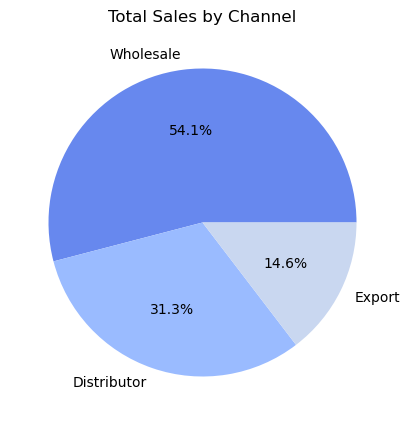

In [61]:
# Pie chart of sales by channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels = chan_sales.index,
    autopct = '%1.1f%%',
    colors = sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')
plt.show()

In [72]:
# Wholesale is the dominant sales channel, accounting for 54.1% of total sales—this reinforces its role as a strategic priority. 
# Export lags behind at 14.6%, suggesting potential for growth through international expansion or targeted outreach.

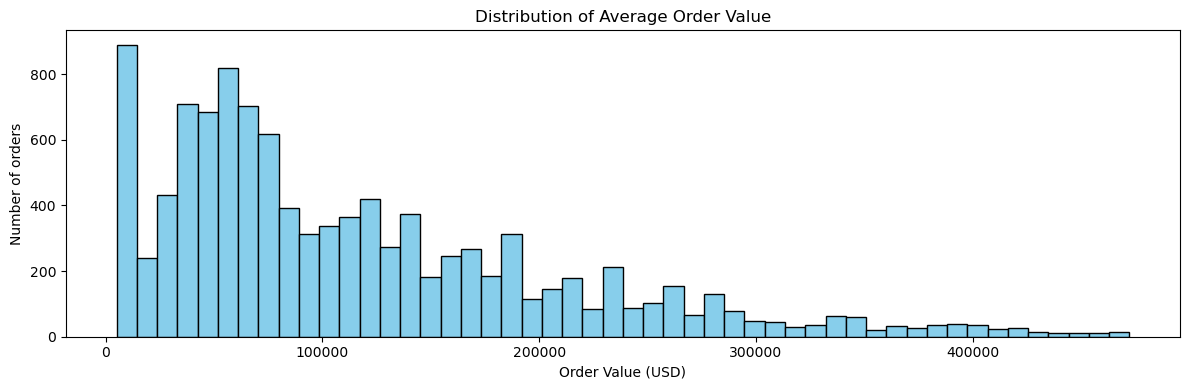

In [62]:
# Average Order Value (AOV) Distribution 

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins = 50,
    color= 'skyblue',
    edgecolor = 'black'    
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel("Number of orders")

plt.tight_layout()
plt.show()

In [ ]:
# This chart shows the distribution of average order value across products. 
# Most orders fall within the lower value range, with a sharp drop as values increase. 
# The right-skewed shape indicates that high-value purchases are rare but potentially impactful.

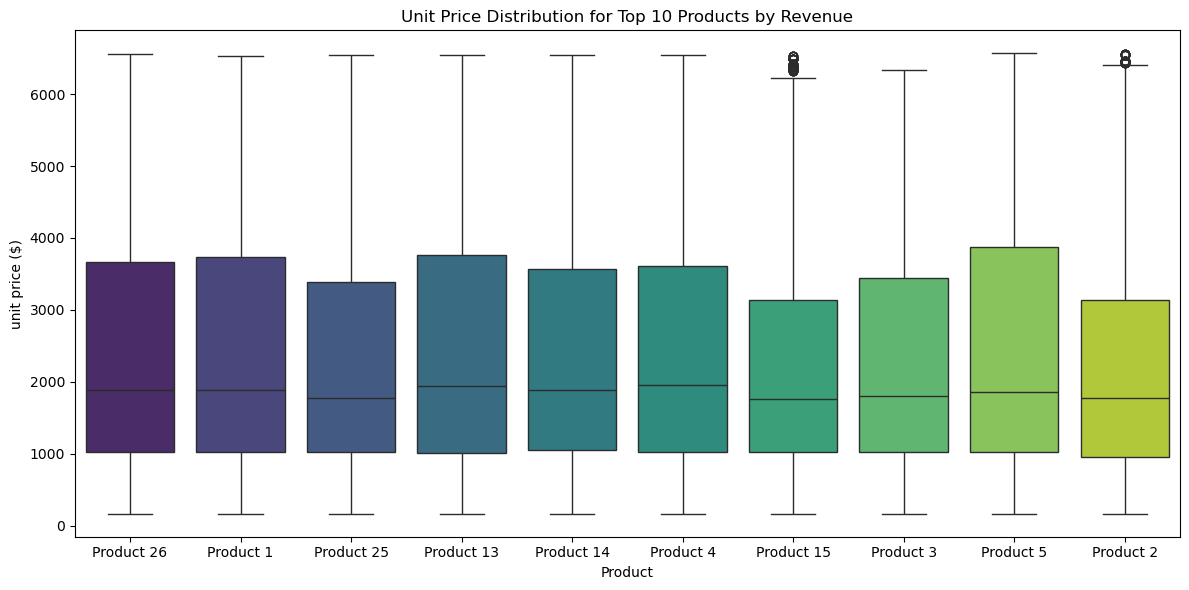

In [73]:
# Unit Price Distribution Per Product

product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by='revenue', ascending = False).head(10)['product_name'].tolist()

df_top_10 = df[df['product_name'].isin(top_10_products)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_10, x = 'product_name', y = 'unit_price', hue = 'product_name', palette = 'viridis')
plt.title('Unit Price Distribution for Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('unit price ($)')
plt.tight_layout()

plt.show()

In [ ]:
# This chart shows the unit price distribution for the top 10 products in our company. 
# Unit prices vary widely across these top performers—some show tight pricing consistency, while others have broader spreads and outliers. 
# These differences may reflect varied pricing strategies or customer segments, and can help identify where pricing control or review is needed.

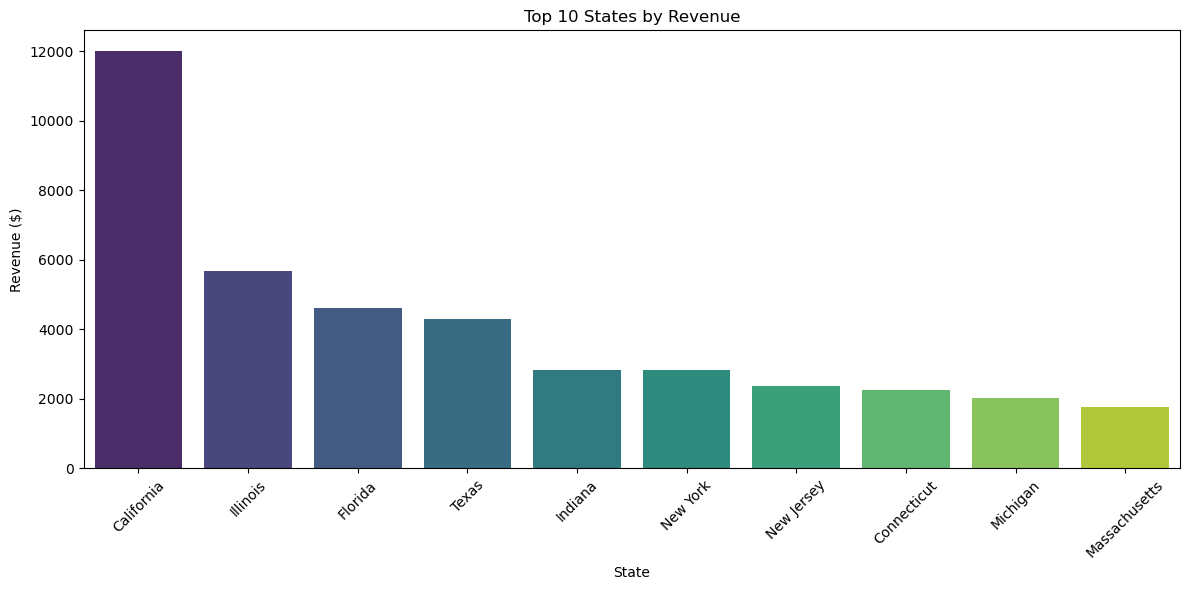

In [65]:
# Top 10 States by Revenue 

top_states_revenue = (
    df.groupby('state')['revenue']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_states_revenue,
    x='state',
    y='revenue',
    hue = 'state',
    palette='viridis'
)

plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# According to the top 10 states by revenue chart, California leads by a wide margin—nearly double the revenue of second-place Illinois. 
# This indicates a strong regional concentration of sales, making California a key market for continued focus and investment.

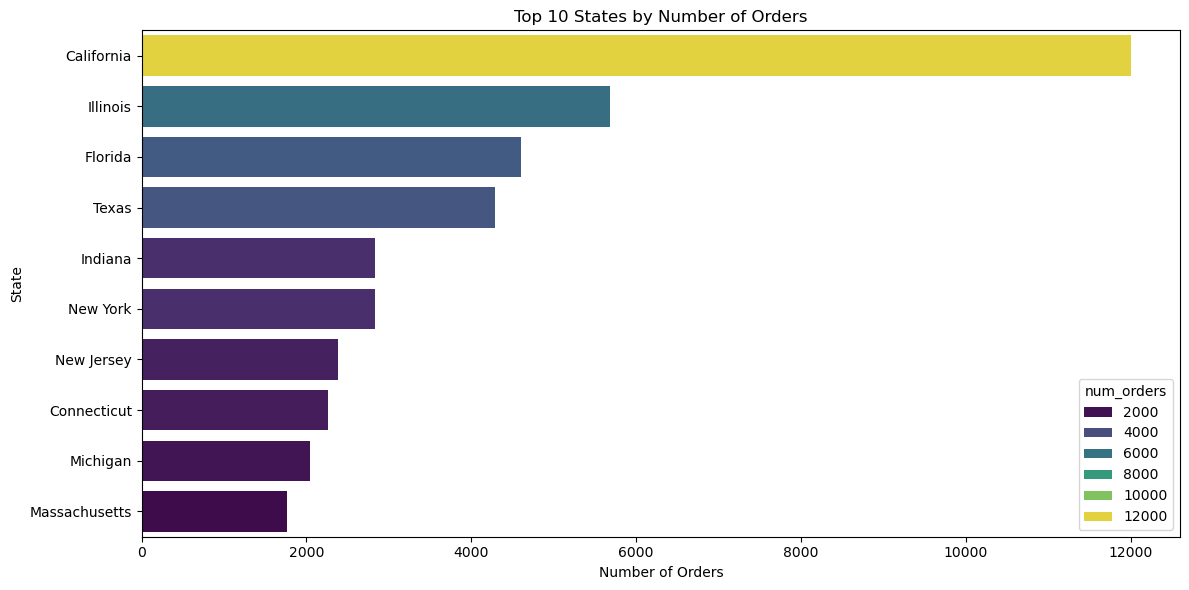

In [66]:
#Top 10 States by Number of Orders

top_states_orders = (
    df.groupby('state')['order_number']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_states_orders.rename(columns={'order_number':'num_orders'}, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(data=top_states_orders, y='state', x='num_orders', hue = 'num_orders', palette = 'viridis')
plt.title('Top 10 States by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.tight_layout()
plt.show()


In [75]:
# The top 10 states by number of orders are shown in the chart. 
# California again leads with the highest order volume. 
# Ranking first in both total orders and revenue highlights its strong customer engagement and purchasing power.

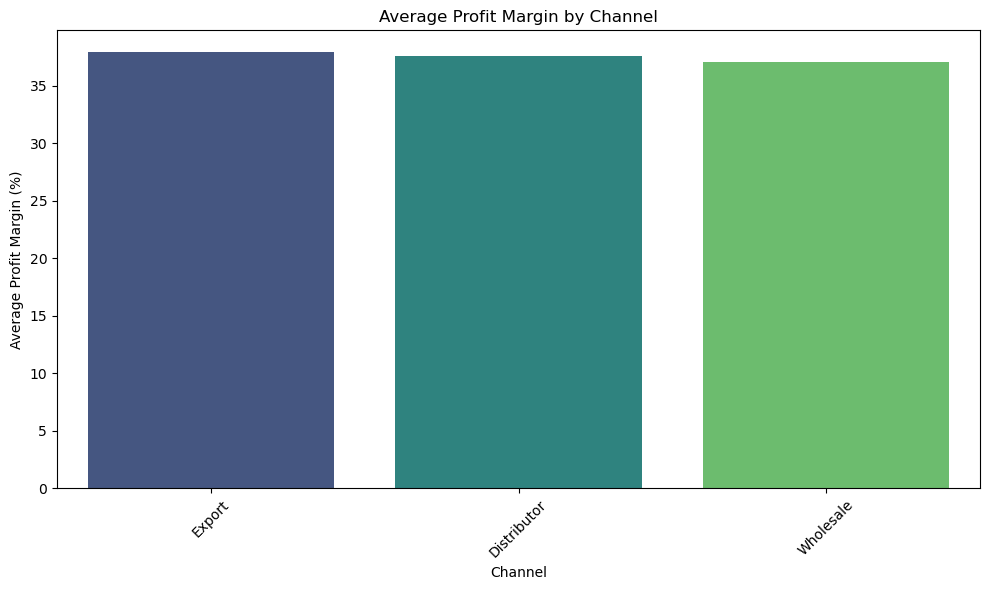

In [67]:
# Average Profit Margin by Channel

avg_profit_margin = (
    df.groupby('channel')['profit_margin_pct']
    .mean()
    .reset_index()
    .sort_values('profit_margin_pct', ascending=False)
)


plt.figure(figsize=(10,6))
sns.barplot(data=avg_profit_margin, x='channel', y='profit_margin_pct', hue = 'channel', palette = 'viridis')
plt.title('Average Profit Margin by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
# The average profit margin across all channels is fairly consistent, hovering slightly above 35%. 
# This suggests a balanced pricing and cost structure across sales channels, with no major outliers in profitability.

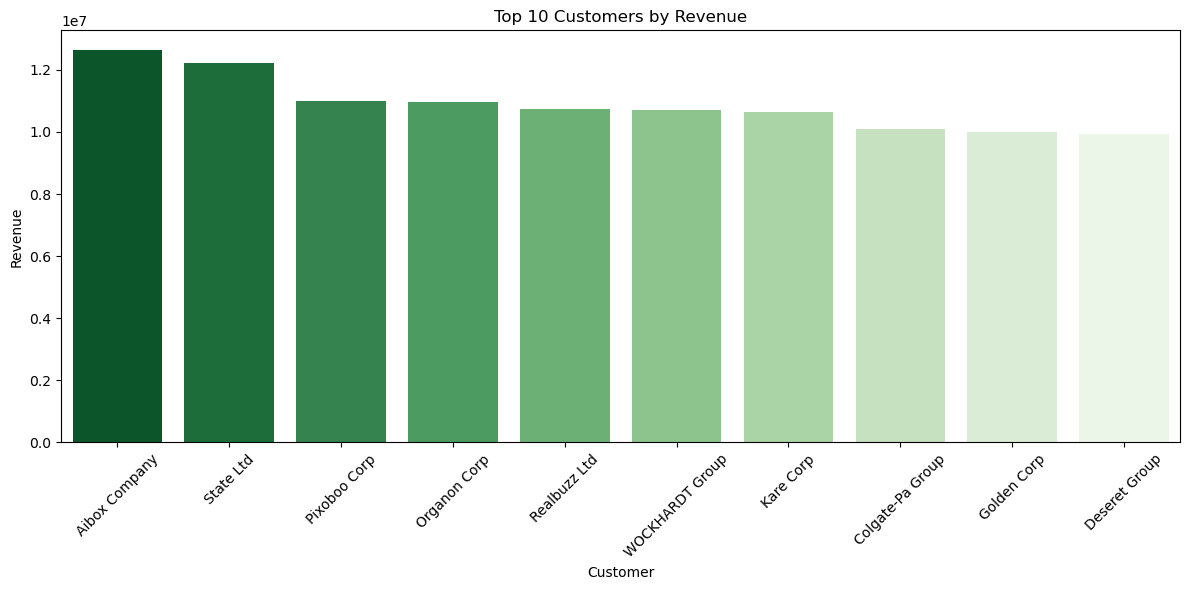

In [68]:
# Top and Bottom 10 Customers by Revenue

customer_revenue = (
    df.groupby('customer_name')['revenue']
    .sum()
    .reset_index()
    .sort_values('revenue', ascending=False)
)


top_10_customers = customer_revenue.head(10)
bottom_10_customers = customer_revenue.tail(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_customers, x='customer_name', y='revenue', hue = 'customer_name', palette='Greens_r')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [77]:
# According to the chart, Aibox Company is our top revenue-generating customer, followed by State Ltd and Pixoboo Corp.
# Focusing on retention and upselling within this high-value group could yield even greater returns.

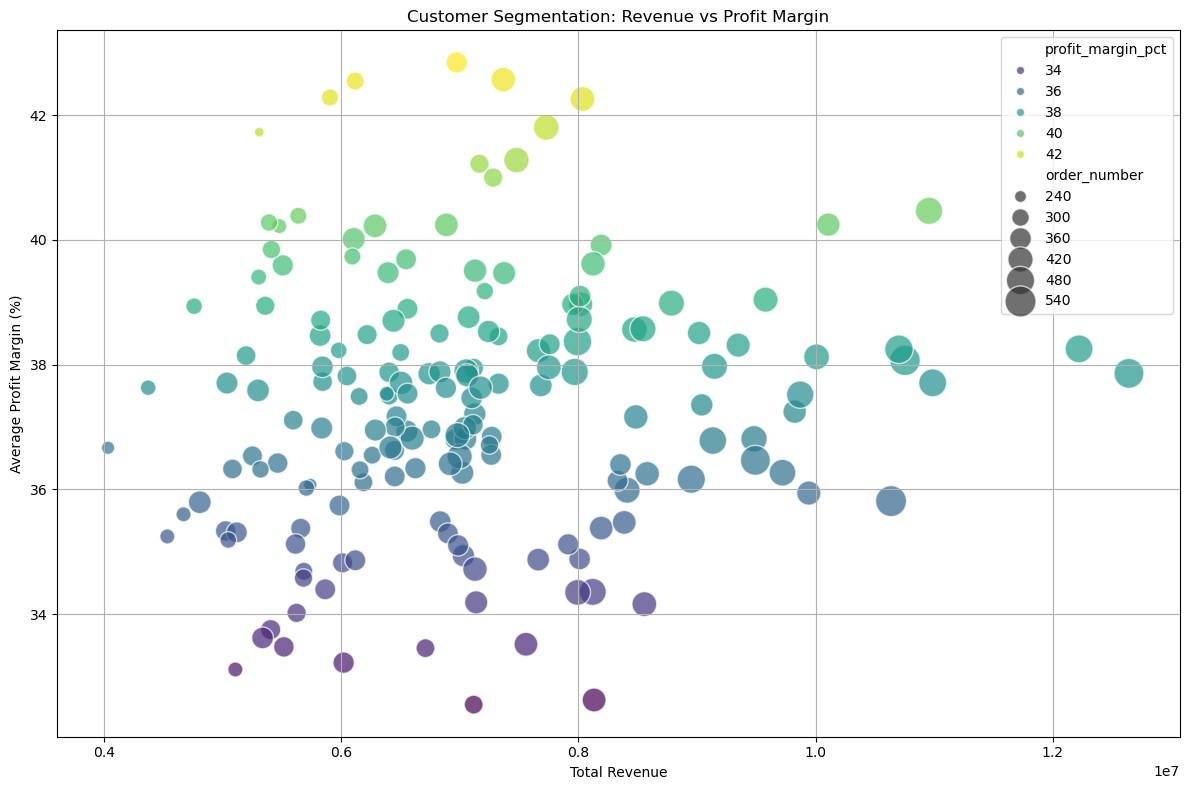

In [69]:
# Customer Segmentation: Revenue vs Profit Margin

customer_seg = df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin_pct': 'mean',
    'order_number': 'count'  # optional, to show order volume
}).reset_index()

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=customer_seg,
    x='revenue',
    y='profit_margin_pct',
    size='order_number',  # optional: size of point = number of orders
    hue='profit_margin_pct',  # color based on profit margin
    palette='viridis',
    sizes=(50, 500),
    alpha=0.7
)
plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True)
plt.tight_layout()
plt.show()




In [78]:
# This chart shows that some customers deliver both high revenue and strong profit margins, making them ideal targets for retention and growth. 
# The larger bubbles in the upper-right quadrant represent high-value, high-margin, high-order clients—segments that are strategically valuable
    # for long-term success.

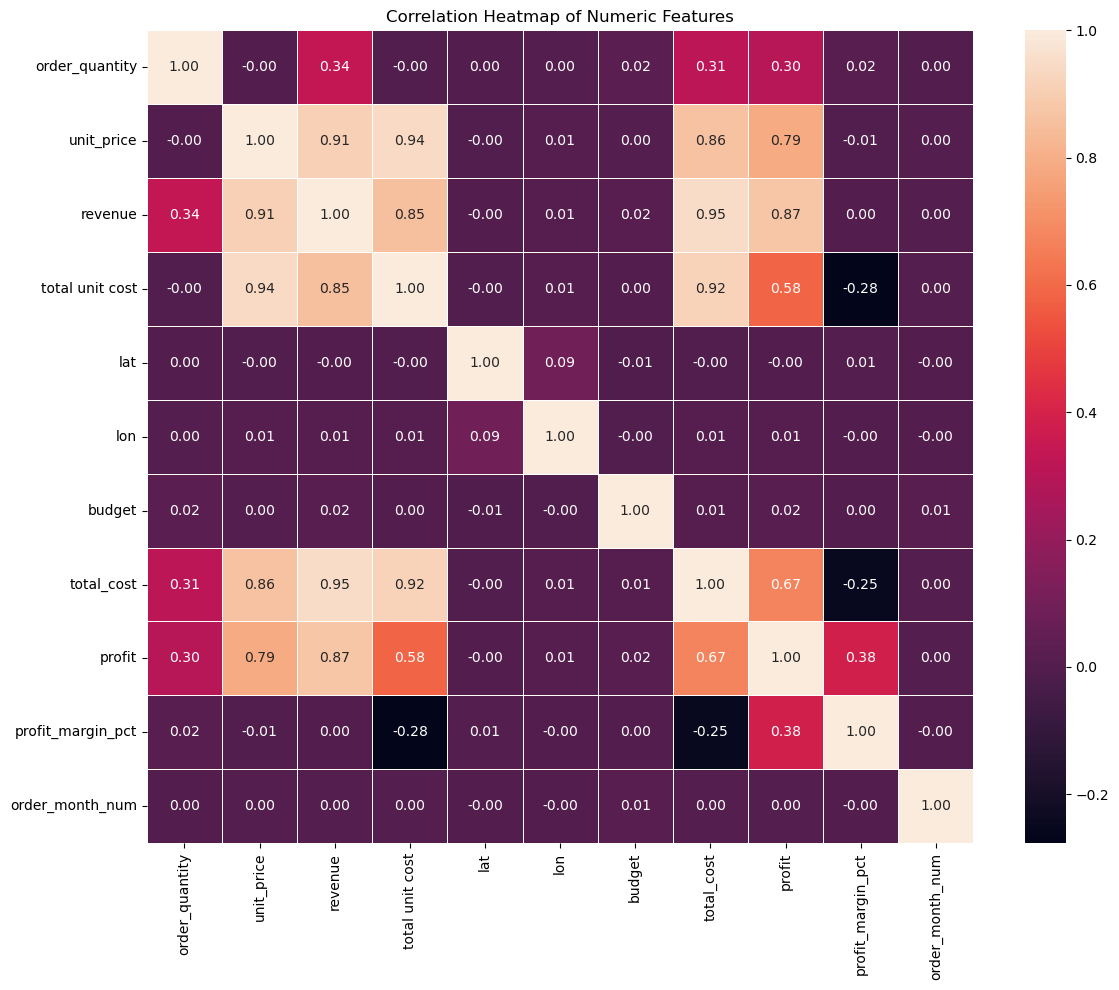

In [70]:
# Correlation Heatmap

numeric_cols = df.select_dtypes(include='number')  # automatically selects all numeric columns

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


In [ ]:
# According to the correlation map, revenue is strongly linked to both order_quantity and unit_price—indicating that larger orders and higher prices drive more sales. Profit also rises with revenue (correlation: 0.87), reinforcing the importance of volume and pricing in profitability.